In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolkit import filepath_to_csv, Orchids_filepath_to_csv

In [226]:
filepaths = [
    "round-2-island-data-bottle\prices_round_2_day_-1.csv",
    "round-2-island-data-bottle\prices_round_2_day_0.csv",
    "round-2-island-data-bottle\prices_round_2_day_1.csv",
]

dfs = []
for filepath in filepaths:
    df = Orchids_filepath_to_csv(filepath)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['total_time'] = (df['DAY'] + 1)* 1000000 + df['timestamp']


#df.drop(['timestamp'], axis=1, inplace=True)

In [227]:
def graph_values(df, column_name):
    # Assuming df is your DataFrame
    fig, ax = plt.subplots()  # Create a single plot

    # Plot ORCHIDS on primary y-axis (left)
    ax.plot(df['total_time'], df['ORCHIDS'], label='ORCHIDS')
    ax.set_ylabel('ORCHID Values')

    # Right-hand y-axis ticks (for SUNLIGHT)
    ax2 = ax.twinx()
    ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
    right_spine = ax2.spines['right']
    right_spine.set_position(('axes', 1.1))  # Adjust right spine position

    # Plot SUNLIGHT on secondary y-axis (right)
    ax2.plot(df['total_time'], df[column_name], color='red', label=column_name)
    ax2.set_ylabel(column_name + ' Values', color='red')

    # Labels and legend
    plt.xlabel('Total Time')
    plt.title(column_name + 'and ORCHIDS vs. Total Time')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.tight_layout()
    plt.show()

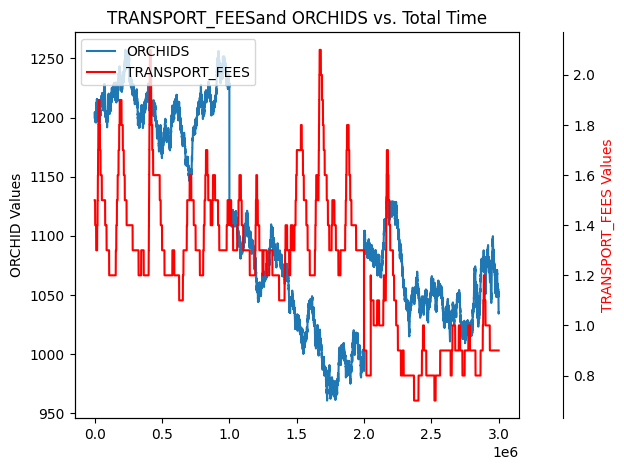

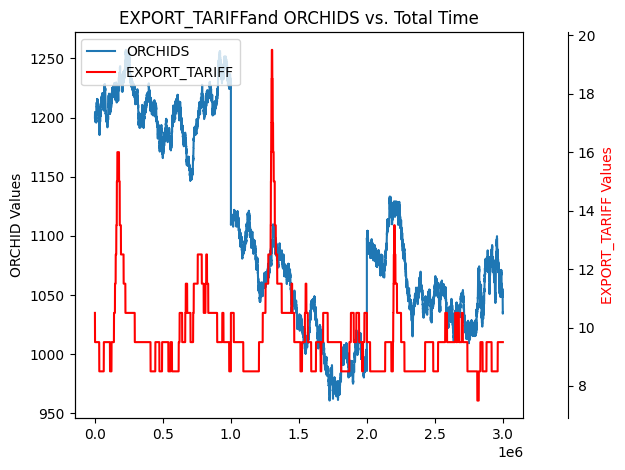

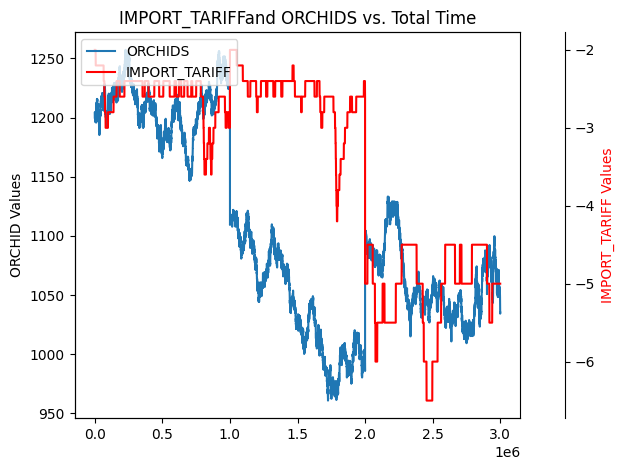

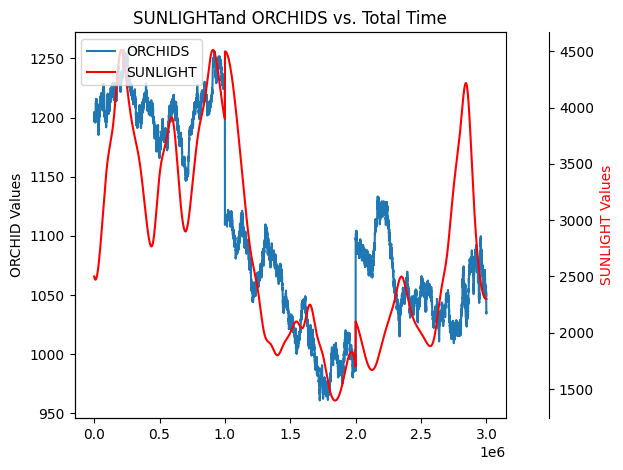

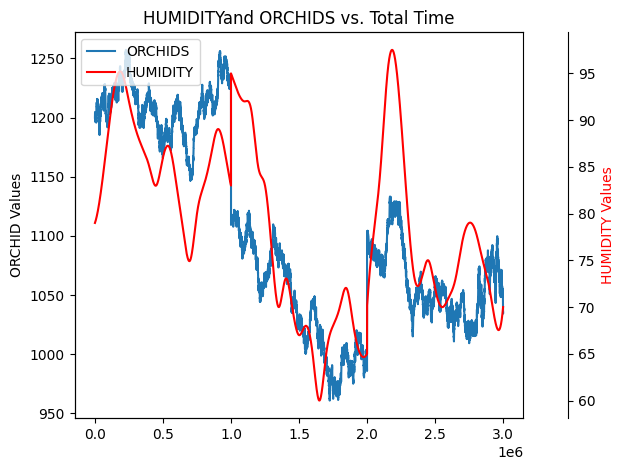

In [228]:
for i in list(df.columns)[2:7]:
    graph_values(df, i)

In [229]:
d1 = df[df.DAY == -1].reset_index()
d2 = df[df.DAY == 0].reset_index()
d3 = df[df.DAY == 1].reset_index()

In [230]:
df_back1 = pd.concat([d1['total_time'], d2['ORCHIDS'], d1['SUNLIGHT'], d1['HUMIDITY']], axis=1)
df_back2 = pd.concat([d2['total_time'], d3['ORCHIDS'], d2['SUNLIGHT'], d2['HUMIDITY']], axis=1)

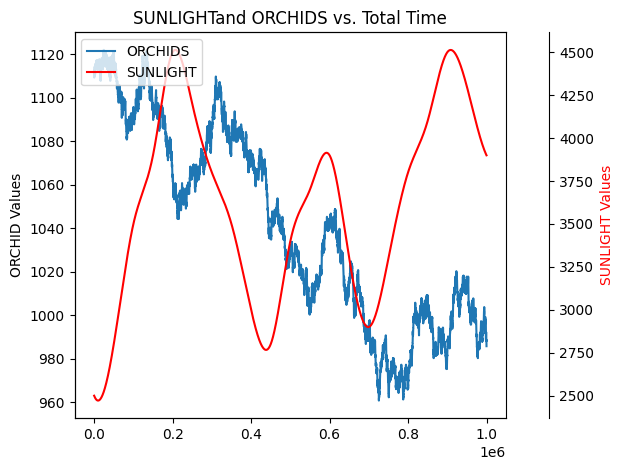

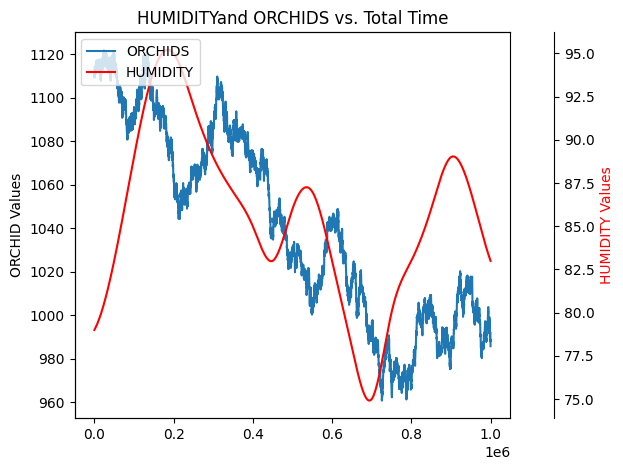

In [231]:
for i in list(df_back1.columns)[2:]:
    graph_values(df_back1, i)

<Axes: >

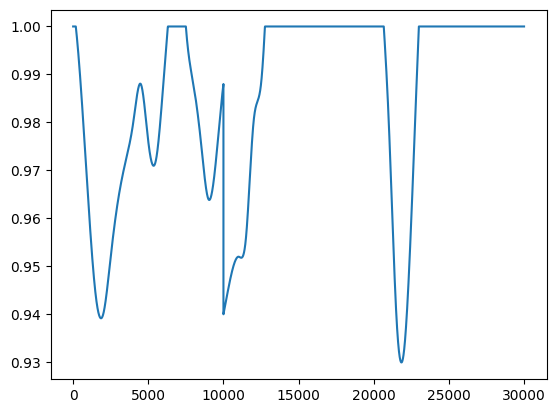

In [232]:
humidity_rate = lambda x: 1 - (2/5) * (0.6-x) if x < 0.6 else ((1 - (2/5) * (x-0.8)) if x > 0.8 else 1)
(df.HUMIDITY / 100).apply(humidity_rate).plot()

<Axes: >

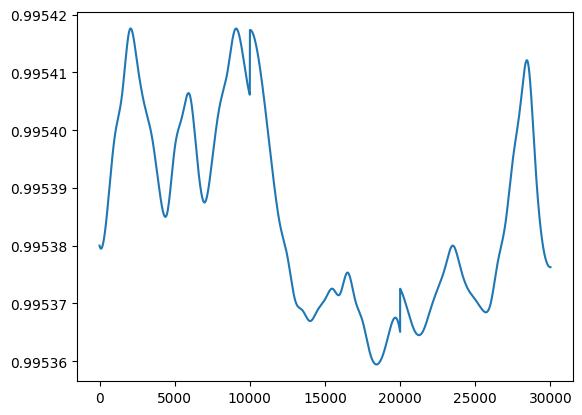

In [233]:
sunlight_rate = lambda x: 1 - (0.04/60) * (7/2500) * (2500 - x)

(df.SUNLIGHT / 100).apply(sunlight_rate).plot()

<Axes: >

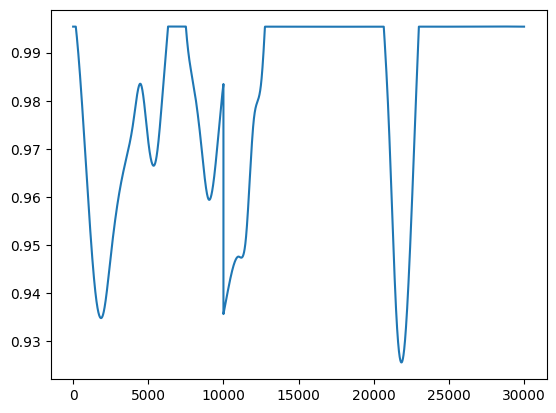

In [234]:
(((df.HUMIDITY / 100).apply(humidity_rate)) * ((df.SUNLIGHT / 100).apply(sunlight_rate))).plot()

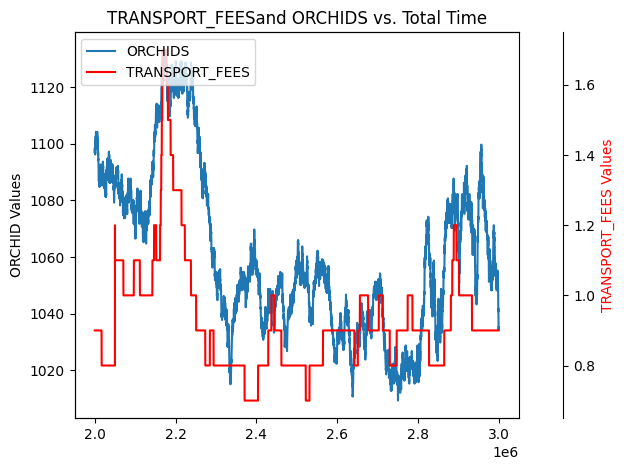

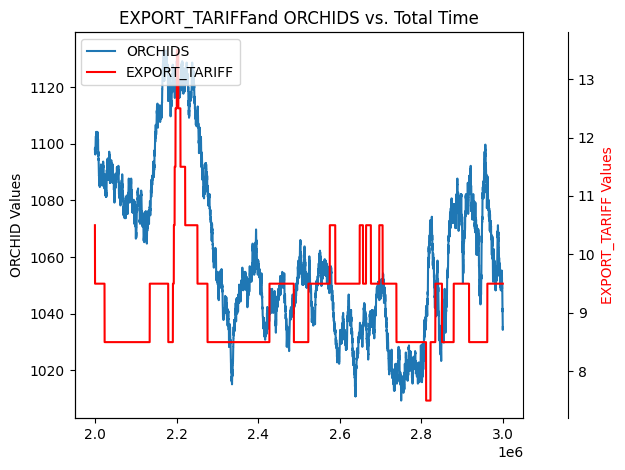

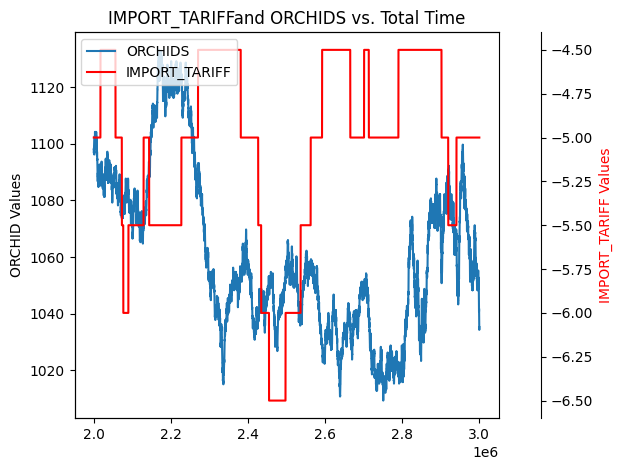

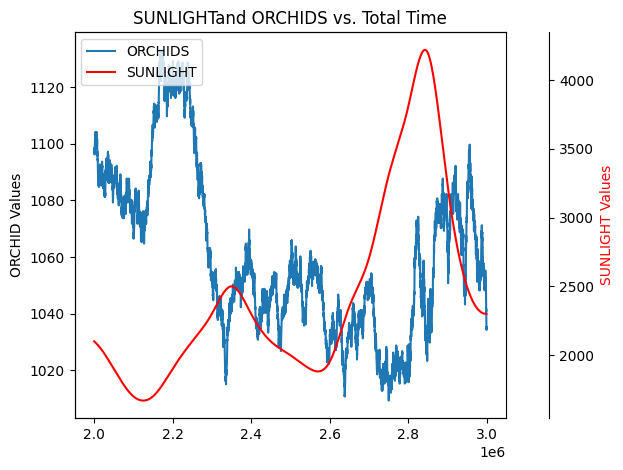

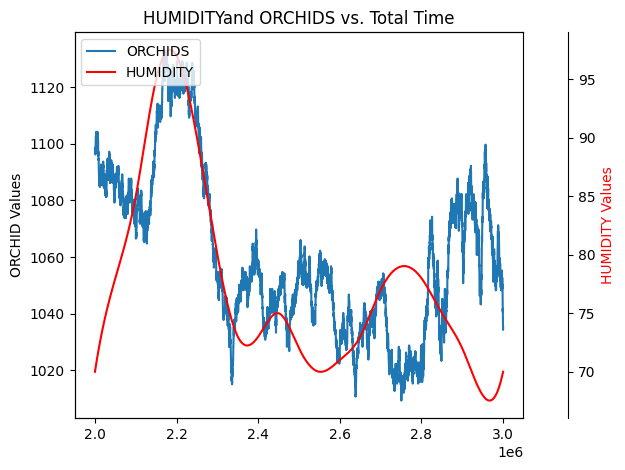

In [235]:
for i in list(d1.columns)[3:8]:
    graph_values(d3, i)

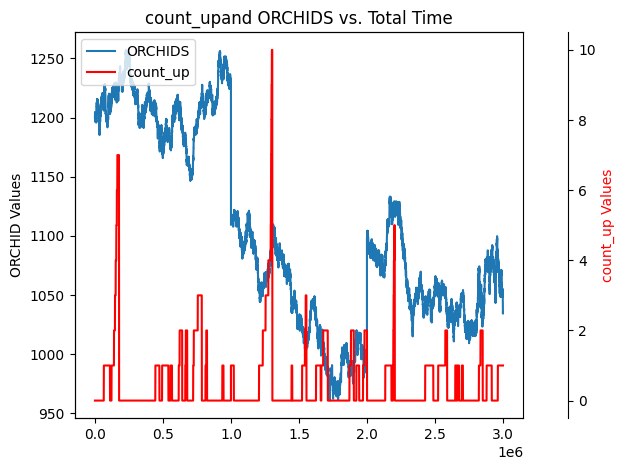

In [236]:
def count_upward_movements(df, col_name):
  """
  This function adds a new column to a DataFrame that counts the number of consecutive upward movements in an existing column.
  The count resets to 0 when a downward movement is encountered.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column to analyze.
      col_name (str): The name of the column containing the values to be analyzed.

  Returns:
      pandas.DataFrame: The DataFrame with the new column added.
  """
  df['count_up'] = 0  # Create a new column for the count

  # Iterate through the DataFrame (assuming numerical data in 'col_name')
  for i in range(1, len(df)):
    prev_value = df.loc[i-1, col_name]
    curr_value = df.loc[i, col_name]
    if curr_value > prev_value:
      df.loc[i, 'count_up'] = df.loc[i-1, 'count_up'] + 1
    elif curr_value < prev_value:
      df.loc[i, 'count_up'] = 0
    else:
      df.loc[i, 'count_up'] = df.loc[i-1, 'count_up']

  return df

df_with_counts = count_upward_movements(df.copy(), 'EXPORT_TARIFF')
graph_values(df_with_counts, 'count_up') # either use count up or stop at export tariff == 9